# Amazon_data

## Part 1: Database and Jupyter Notebook Set Up
### Using following command to import dataset into mongo_db:

 mongoimport --type csv -d Clean_Data_Resources -c amazon_cleanData --headerline --drop amazon_cleanData.csv

In [1]:
# Import dependencies
from pymongo import MongoClient
from pprint import pprint
import pandas as pd

In [2]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [3]:
# confirm that our new database was created
print(mongo.list_database_names())

['Clean_Data_Resources', 'Data', 'admin', 'autosaurus', 'classDB', 'config', 'epa', 'fruits_db', 'gardenDB', 'local', 'met', 'petsitly_marketing', 'uk_food']


In [4]:
# assign the uk_food database to a variable name
db = mongo['Clean_Data_Resources']

In [5]:
# review the collections in our amazon database
print(db.list_collection_names())

['amazon_cleanData']


In [6]:
# review a document in the establishments collection
#Display the first document in the results using pprint before filter
pprint(db.amazon_cleanData.find_one())

{'_id': ObjectId('65bbe25e1c3678ff210ffaca'),
 'about_product': '【 Fast Charger& Data Sync】-With built-in safety '
                  'proctections and four-core copper wires promote maximum '
                  'signal quality and strength and enhance charging & data '
                  'transfer speed with up to 480 mb/s transferring speed.|【 '
                  'Compatibility】-Compatible with iPhone 13, 12,11, X, 8, 7, '
                  '6, 5, iPad Air, Pro, Mini & iOS devices.|【 Sturdy & '
                  'Durable】-The jacket and enforced connector made of TPE and '
                  'premium copper, are resistant to repeatedly bending and '
                  'coiling.|【 Ultra High Quality】: According to the '
                  'experimental results, the fishbone design can accept at '
                  'least 20,000 bending and insertion tests for extra '
                  'protection and durability. Upgraded 3D aluminum connector '
                  'and exclusive laser welding

In [7]:
# pprint(db.amazon_cleanData.findall)

In [8]:
# assign the collection to a variable
amazon = db['amazon_cleanData']

In [9]:
# Display the total number of items in the amazon collection
amazon.count_documents({})

1462

In [10]:
#  Create a query that finds all USB cables in the 'amazon' collection
# Filter results by name
query = {'category': 'ComputersAccessoriesAccessoriesPeripheralsCablesAccessoriesCablesUSBCables'}

# Capture the results to a variable
results1 = amazon.find(query)

## Pretty print the results
pprint(results1[0:10])

#displaying results1
for i in results1:
    print(i)

{'_id': ObjectId('65bbe25e1c3678ff210ffaca'), 'product_id': 'B096MSW6CT', 'product_name': 'Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices', 'category': 'ComputersAccessoriesAccessoriesPeripheralsCablesAccessoriesCablesUSBCables', 'discounted_price': 199, 'actual_price': 1899, 'discount_percentage': 0.9, 'rating': 3, 'rating_count': 7928, 'about_product': "【 Fast Charger& Data Sync】-With built-in safety proctections and four-core copper wires promote maximum signal quality and strength and enhance charging & data transfer speed with up to 480 mb/s transferring speed.|【 Compatibility】-Compatible with iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS devices.|【 Sturdy & Durable】-The jacket and enforced connector made of TPE and premium copper, are resistant to repeatedly bending and coiling.|【 Ultra High Quality】: According to the experimental results, the fishbone design can accept at least

In [11]:
# Print the number of results
print("Total Number of items which are Cable Accessories in result are:", amazon.count_documents(query))

Total Number of items which are Cable Accessories in result are: 231


In [12]:
#   Create a query that finds top 10 USB cables in the 'amazon' collection which has discounted price greater than equal to 100 rupees and have rating score greater than equal to 4
# Filter results by name
query = {'category': 'ComputersAccessoriesAccessoriesPeripheralsCablesAccessoriesCablesUSBCables',
        'discounted_price': {'$gte': 100}, 'rating':{'$gte':4}}

# Display the 'category', 'actual_price' and 'discounted_price' fields
fields = {'category' :1, 'product_id':1, 'product_name': 1 , 'discounted_price': 1, 'discount_percentage':1,'actual_price': 1, "rating":1,"review_title":1, "review_content":1, "rating_count":1}

# sort in descending order by 
sort = [('discounted_price', -1),('actual_price', -1), ('rating', -1)]

# limit the results to the first 10
limit = 10

# Pretty print the results
pprint(list(amazon.find(query, fields).sort(sort).limit(limit)))


[{'_id': ObjectId('65bbe25e1c3678ff210ffb42'),
  'actual_price': 1999,
  'category': 'ComputersAccessoriesAccessoriesPeripheralsCablesAccessoriesCablesUSBCables',
  'discount_percentage': 0.2,
  'discounted_price': 1599,
  'product_id': 'B084MZXJNK',
  'product_name': 'Belkin Apple Certified Lightning To Type C Cable, Tough '
                  'Unbreakable Braided Fast Charging For Iphone, Ipad, Air '
                  'Pods, 3.3 Feet (1 Meters)    White',
  'rating': 4,
  'rating_count': 1951,
  'review_content': 'Good cable. got original product and it is durable and '
                    'light weight,Quality is top notch and also tough as hell '
                    'very much durable and charges the devices just like the '
                    'original brand cable. Never have to worry about wear and '
                    'tear of cables.,Fast charging, built quality super,Using '
                    'to charge I phone X with Samsung 25 watt charger, it '
                    'works 

In [13]:
result2 = list(amazon.find(query, fields).sort(sort))

In [14]:
result2

[{'_id': ObjectId('65bbe25e1c3678ff210ffb42'),
  'product_id': 'B084MZXJNK',
  'product_name': 'Belkin Apple Certified Lightning To Type C Cable, Tough Unbreakable Braided Fast Charging For Iphone, Ipad, Air Pods, 3.3 Feet (1 Meters)    White',
  'category': 'ComputersAccessoriesAccessoriesPeripheralsCablesAccessoriesCablesUSBCables',
  'discounted_price': 1599,
  'actual_price': 1999,
  'discount_percentage': 0.2,
  'rating': 4,
  'rating_count': 1951,
  'review_title': 'Perfect product,Better than the original cable,Better then original,Good,The Very Best,Works absolutely fine,Charging is very slow.,Best Product',
  'review_content': 'Good cable. got original product and it is durable and light weight,Quality is top notch and also tough as hell very much durable and charges the devices just like the original brand cable. Never have to worry about wear and tear of cables.,Fast charging, built quality super,Using to charge I phone X with Samsung 25 watt charger, it works fine, charges 

In [15]:
# Initialize an empty list to store the top 10 USB Cables which has discounted price greater than equal to 100 and have ratings greater than equal to 4
topUSB_OVER_100 = []

# Loop through each document in the results and append it to the list
for item in result2:
   topUSB_OVER_100.append(item)

# Now, converted_results is a list of dictionaries
pprint(topUSB_OVER_100)

[{'_id': ObjectId('65bbe25e1c3678ff210ffb42'),
  'actual_price': 1999,
  'category': 'ComputersAccessoriesAccessoriesPeripheralsCablesAccessoriesCablesUSBCables',
  'discount_percentage': 0.2,
  'discounted_price': 1599,
  'product_id': 'B084MZXJNK',
  'product_name': 'Belkin Apple Certified Lightning To Type C Cable, Tough '
                  'Unbreakable Braided Fast Charging For Iphone, Ipad, Air '
                  'Pods, 3.3 Feet (1 Meters)    White',
  'rating': 4,
  'rating_count': 1951,
  'review_content': 'Good cable. got original product and it is durable and '
                    'light weight,Quality is top notch and also tough as hell '
                    'very much durable and charges the devices just like the '
                    'original brand cable. Never have to worry about wear and '
                    'tear of cables.,Fast charging, built quality super,Using '
                    'to charge I phone X with Samsung 25 watt charger, it '
                    'works 

In [16]:
# Create a DataFrame from the list 
df_Top_usb_over_100 = pd.DataFrame(topUSB_OVER_100)

# Display the DataFrame
print(df_Top_usb_over_100)

                          _id  product_id  \
0    65bbe25e1c3678ff210ffb42  B084MZXJNK   
1    65bbe25e1c3678ff210ffc13  B086JTMRYL   
2    65bbe25e1c3678ff210ffb66  B084N133Y7   
3    65bbe25e1c3678ff210ffbd0  B084N1BM9L   
4    65bbe25e1c3678ff210ffb5c  B082T6GXS5   
..                        ...         ...   
186  65bbe25e1c3678ff210ffc02  B09SB6SJB4   
187  65bbe25e1c3678ff210ffb8e  B08P9RYPLR   
188  65bbe25e1c3678ff210ffb13  B08R69VDHT   
189  65bbe25e1c3678ff210ffcfc  B08R69VDHT   
190  65bbe25e1c3678ff210ffe9f  B08R69VDHT   

                                          product_name  \
0    Belkin Apple Certified Lightning To Type C Cab...   
1    ESR USB C to Lightning Cable, 10 ft (3 m), MFi...   
2    Belkin Apple Certified Lightning To Type C Cab...   
3    Belkin Apple Certified Lightning to USB Charge...   
4    AmazonBasics New Release Nylon USB-A to Lightn...   
..                                                 ...   
186  Amazon Brand - Solimo Fast Charging Braided Ty..

In [17]:
#displaying dataframe containing top 10 USB Cables which has discounted price greater than equal to 100 and have ratings greater than equal to 4
df_Top_usb_over_100.head(10)

,_id,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,review_title,review_content
0,65bbe25e1c3678ff210ffb42,B084MZXJNK,Belkin Apple Certified Lightning To Type C Cab...,ComputersAccessoriesAccessoriesPeripheralsCabl...,1599,1999,0.20,4,1951,"Perfect product,Better than the original cable...",Good cable. got original product and it is dur...
1,65bbe25e1c3678ff210ffc13,B086JTMRYL,"ESR USB C to Lightning Cable, 10 ft (3 m), MFi...",ComputersAccessoriesAccessoriesPeripheralsCabl...,1519,1899,0.20,4,19763,"Go for it,Fast charging,Good product,Good,So F...",Everything is great go for it after all it’s e...
2,65bbe25e1c3678ff210ffb66,B084N133Y7,Belkin Apple Certified Lightning To Type C Cab...,ComputersAccessoriesAccessoriesPeripheralsCabl...,1499,1999,0.25,4,1951,"Perfect product,Better than the original cable...",Good cable. got original product and it is dur...
3,65bbe25e1c3678ff210ffbd0,B084N1BM9L,Belkin Apple Certified Lightning to USB Charge...,ComputersAccessoriesAccessoriesPeripheralsCabl...,1299,1999,0.35,4,7318,You might be able to get away by using other u...,Recently ordered other. Usb for just 150 rsThe...
4,65bbe25e1c3678ff210ffb5c,B082T6GXS5,AmazonBasics New Release Nylon USB-A to Lightn...,ComputersAccessoriesAccessoriesPeripheralsCabl...,999,2100,0.52,4,5492,"Good,QUALITY IS GOOD,Value for money product,V...","It works more than expected , little bit lose ..."
5,65bbe25e1c3678ff210ffb90,B084MZXJN6,Belkin Apple Certified Lightning to USB Charge...,ComputersAccessoriesAccessoriesPeripheralsCabl...,999,1699,0.41,4,7318,You might be able to get away by using other u...,Recently ordered other. Usb for just 150 rsThe...
6,65bbe25e1c3678ff210ffae6,B09W5XR9RT,Duracell USB C To Lightning Apple Certified (M...,ComputersAccessoriesAccessoriesPeripheralsCabl...,970,1999,0.51,4,184,"Very good product.,Using as a spare cable in c...","Fast charging.,Cable seems to be of good quali..."
7,65bbe25e1c3678ff210ffaf0,B09C6HWG18,Duracell Type C To Type C 5A (100W) Braided Sy...,ComputersAccessoriesAccessoriesPeripheralsCabl...,970,1999,0.51,4,462,"Product is as expected,Cable has problem with ...",Same type is available in half prize other mak...
8,65bbe25e1c3678ff210ffcc0,B09W5XR9RT,Duracell USB C To Lightning Apple Certified (M...,ComputersAccessoriesAccessoriesPeripheralsCabl...,970,1999,0.51,4,184,"Very good product.,Using as a spare cable in c...","Fast charging.,Cable seems to be of good quali..."
9,65bbe25e1c3678ff210ffdd8,B09W5XR9RT,Duracell USB C To Lightning Apple Certified (M...,ComputersAccessoriesAccessoriesPeripheralsCabl...,970,1999,0.51,4,184,"Very good product.,Using as a spare cable in c...","Fast charging.,Cable seems to be of good quali..."


In [18]:
print(df_Top_usb_over_100.columns)

Index(['_id', 'product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'review_title', 'review_content'],
      dtype='object')


In [19]:
# Reorder the columns
Reordered_Top_usb_over_100 = df_Top_usb_over_100[[
    "product_id", "product_name", "category", "actual_price", "discounted_price",
    "discount_percentage", "rating", "review_title", "review_content","rating_count"
]]

# Print the first 10 rows of the DataFrame
print("The Top 10 USB Cables which has discounted price greater than equal to 100 and have ratings greater than equal to 4 are following:")
Reordered_Top_usb_over_100.head(10)

The Top 10 USB Cables which has discounted price greater than equal to 100 and have ratings greater than equal to 4 are following:


,product_id,product_name,category,actual_price,discounted_price,discount_percentage,rating,review_title,review_content,rating_count
0,B084MZXJNK,Belkin Apple Certified Lightning To Type C Cab...,ComputersAccessoriesAccessoriesPeripheralsCabl...,1999,1599,0.20,4,"Perfect product,Better than the original cable...",Good cable. got original product and it is dur...,1951
1,B086JTMRYL,"ESR USB C to Lightning Cable, 10 ft (3 m), MFi...",ComputersAccessoriesAccessoriesPeripheralsCabl...,1899,1519,0.20,4,"Go for it,Fast charging,Good product,Good,So F...",Everything is great go for it after all it’s e...,19763
2,B084N133Y7,Belkin Apple Certified Lightning To Type C Cab...,ComputersAccessoriesAccessoriesPeripheralsCabl...,1999,1499,0.25,4,"Perfect product,Better than the original cable...",Good cable. got original product and it is dur...,1951
3,B084N1BM9L,Belkin Apple Certified Lightning to USB Charge...,ComputersAccessoriesAccessoriesPeripheralsCabl...,1999,1299,0.35,4,You might be able to get away by using other u...,Recently ordered other. Usb for just 150 rsThe...,7318
4,B082T6GXS5,AmazonBasics New Release Nylon USB-A to Lightn...,ComputersAccessoriesAccessoriesPeripheralsCabl...,2100,999,0.52,4,"Good,QUALITY IS GOOD,Value for money product,V...","It works more than expected , little bit lose ...",5492
5,B084MZXJN6,Belkin Apple Certified Lightning to USB Charge...,ComputersAccessoriesAccessoriesPeripheralsCabl...,1699,999,0.41,4,You might be able to get away by using other u...,Recently ordered other. Usb for just 150 rsThe...,7318
6,B09W5XR9RT,Duracell USB C To Lightning Apple Certified (M...,ComputersAccessoriesAccessoriesPeripheralsCabl...,1999,970,0.51,4,"Very good product.,Using as a spare cable in c...","Fast charging.,Cable seems to be of good quali...",184
7,B09C6HWG18,Duracell Type C To Type C 5A (100W) Braided Sy...,ComputersAccessoriesAccessoriesPeripheralsCabl...,1999,970,0.51,4,"Product is as expected,Cable has problem with ...",Same type is available in half prize other mak...,462
8,B09W5XR9RT,Duracell USB C To Lightning Apple Certified (M...,ComputersAccessoriesAccessoriesPeripheralsCabl...,1999,970,0.51,4,"Very good product.,Using as a spare cable in c...","Fast charging.,Cable seems to be of good quali...",184
9,B09W5XR9RT,Duracell USB C To Lightning Apple Certified (M...,ComputersAccessoriesAccessoriesPeripheralsCabl...,1999,970,0.51,4,"Very good product.,Using as a spare cable in c...","Fast charging.,Cable seems to be of good quali...",184


In [20]:
import matplotlib.pyplot as plt
import pandas as pd

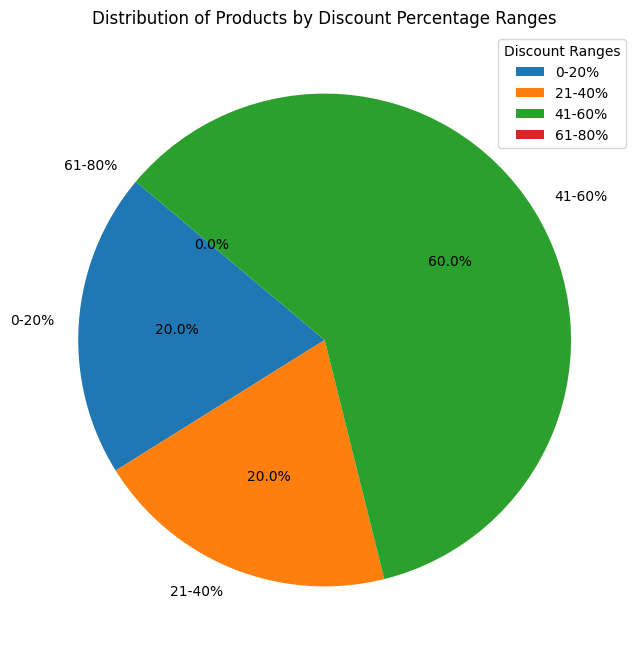

In [21]:
#Creating a Dataframe for the discount_percentage between top usb over 100 rupees
data = {
    "product_id": ["B084MZXJNK", "B086JTMRYL", "B084N133Y7", "B084N1BM9L", "B082T6GXS5", "B084MZXJN6", "B09W5XR9RT", "B09C6HWG18", "B09W5XR9RT", "B09W5XR9RT"],
    "discount_percentage": [0.20, 0.20, 0.25, 0.35, 0.52, 0.41, 0.51, 0.51, 0.51, 0.51]
}

df = pd.DataFrame(data)

# Define discount ranges
discount_ranges = ["0-20%", "21-40%", "41-60%", "61-80%"]
discount_counts = [0, 0, 0, 0]  # Initialize count for each range

# Categorize each product into a discount range
for discount in df["discount_percentage"]:
    if discount <= 0.20:
        discount_counts[0] += 1
    elif discount <= 0.40:
        discount_counts[1] += 1
    elif discount <= 0.60:
        discount_counts[2] += 1
    else:
        discount_counts[3] += 1

# Generate pie chart
# Generate pie chart
plt.figure(figsize=(8, 8))
pie_wedges = plt.pie(discount_counts, labels=discount_ranges, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Products by Discount Percentage Ranges')

# Add a legend
plt.legend(pie_wedges[0], discount_ranges, title="Discount Ranges", loc="best")

plt.show()

In [22]:
#   Create a query that finds all USB cables in the 'amazon' collection greater than equal to 100 rupees having rating score greater than equal to 4
# Filter results by name
query = {'category': 'ComputersAccessoriesAccessoriesPeripheralsCablesAccessoriesCablesUSBCables',
        'discounted_price': {'$gte': 100}, 'rating':{'$gte':4}}

# Display the 'category', 'actual_price' and 'discounted_price' fields
fields = {'category' :1, 'product_id':1, 'product_name': 1 , 'discounted_price': 1, 'discount_percentage':1,'actual_price': 1, "rating":1,"review_title":1, "review_content":1, "rating_count":1}

# sort in descending order by 
sort = [('discounted_price', -1),('actual_price', -1), ('rating', -1)]

# limit the results to the first 10
#limit = 10

# Pretty print the results
pprint(list(amazon.find(query, fields).sort(sort)))


[{'_id': ObjectId('65bbe25e1c3678ff210ffb42'),
  'actual_price': 1999,
  'category': 'ComputersAccessoriesAccessoriesPeripheralsCablesAccessoriesCablesUSBCables',
  'discount_percentage': 0.2,
  'discounted_price': 1599,
  'product_id': 'B084MZXJNK',
  'product_name': 'Belkin Apple Certified Lightning To Type C Cable, Tough '
                  'Unbreakable Braided Fast Charging For Iphone, Ipad, Air '
                  'Pods, 3.3 Feet (1 Meters)    White',
  'rating': 4,
  'rating_count': 1951,
  'review_content': 'Good cable. got original product and it is durable and '
                    'light weight,Quality is top notch and also tough as hell '
                    'very much durable and charges the devices just like the '
                    'original brand cable. Never have to worry about wear and '
                    'tear of cables.,Fast charging, built quality super,Using '
                    'to charge I phone X with Samsung 25 watt charger, it '
                    'works 

In [27]:
#  Create a query that finds all USB cables in the 'amazon' collection
# Filter results by name
query = {'category': 'ComputersAccessoriesAccessoriesPeripheralsCablesAccessoriesCablesUSBCables'}

# Capture the results to a variable
results1 = amazon.find(query)

## Pretty print the results
pprint(results1[0:10])

#displaying results1
for i in results1:
    print(i)

{'_id': ObjectId('65bbe25e1c3678ff210ffaca'), 'product_id': 'B096MSW6CT', 'product_name': 'Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices', 'category': 'ComputersAccessoriesAccessoriesPeripheralsCablesAccessoriesCablesUSBCables', 'discounted_price': 199, 'actual_price': 1899, 'discount_percentage': 0.9, 'rating': 3, 'rating_count': 7928, 'about_product': "【 Fast Charger& Data Sync】-With built-in safety proctections and four-core copper wires promote maximum signal quality and strength and enhance charging & data transfer speed with up to 480 mb/s transferring speed.|【 Compatibility】-Compatible with iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS devices.|【 Sturdy & Durable】-The jacket and enforced connector made of TPE and premium copper, are resistant to repeatedly bending and coiling.|【 Ultra High Quality】: According to the experimental results, the fishbone design can accept at least

In [24]:
 #Build the aggregation pipeline

# Write an aggregation query that counts the number of documents, grouped by "Country", then "classification"
group_query = {
    '$group': {
        '_id': {"category": "$category"},
        'count': {'$sum': 1}
    }
}

# #match_query = {
#     '$match': {'count': {'$gte': 5}}
# }

sort_values = {
    '$sort': {'_id.category': 1, 'count': -1}
}

pipeline = [group_query,  sort_values]

In [25]:
# Run the pipeline through the aggregate method, cast the results as a list, and save the results to a variable
results3 = list(amazon.aggregate(pipeline))

In [26]:
# Print the number of rows in the result
print("Number of rows in result: ", len(results3))

Number of rows in result:  211
